# Regular Expressions

In [1]:
import regex
import os
import re

The task is concentrated on using regular expressions for extracting basic information from textual data. You will get more familiar with the regexp features that are particularly important in natural language processing.



### Read data

In [2]:
path = "./ustawy"
ustawy = []
os.chdir(path)
  
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        ustawy.append(f.read())
    
# iterate through all file
for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{file}"
        read_text_file(file_path)

In [3]:
def count_pattern_occurrences(expression):
    counter = 0
    for ustawa in ustawy:
        pattern = regex.compile(expression, re.I)
        counter += len([*regex.finditer(pattern, ustawa)])
    return counter

In [4]:
units = "((ust\.)|(art\.)|(poz\.)|(rozdział)|§|pkt|lit\.)"

For each bill compute the number of the following amendments present in the bill:
 * addition of a unit (e.g. dodaje się ust. 5a),

In [5]:
addition_expression = fr"\sdodaje\ssię\s(now[y|e]\s)?{units}"
count_pattern_occurrences(addition_expression)

6159

* removal of a unit (e.g. w art. 10 ust. 1 pkt 8 skreśla się),

In [6]:
removal_expression = fr"(w\s({units}\s)\w+\s((skreśla)|(uchyla))\ssię\s)|(((skreśla)|uchyla)\ssię\s{units})"
count_pattern_occurrences(removal_expression)

2752

* change of a unit (e.g. art. 5 otrzymuje brzmienie).

In [7]:
change_expression = fr"{units}.*(otrzymuj[eą]\s((brzmienie)))"
count_pattern_occurrences(change_expression)

9133

Plot results from point 1 showing how the percentage of amendments of a given type changed in the consecutive years.

In [8]:
from collections import defaultdict

aggregate_per_year = defaultdict(lambda: defaultdict(int))
for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{file}"
        year = int(file.split('_')[0])  
        with open(file_path, 'r') as f:
            ustawa = f.read()
            pattern = regex.compile(addition_expression, re.I)
            aggregate_per_year[year]['addition'] += len([*regex.finditer(pattern, ustawa)])
            pattern = regex.compile(removal_expression, re.I)
            aggregate_per_year[year]['removal'] += len([*regex.finditer(pattern, ustawa)])
            pattern = regex.compile(change_expression, re.I)
            aggregate_per_year[year]['change'] += len([*regex.finditer(pattern, ustawa)])

In [9]:
import pandas as pd
df_aggregated = pd.DataFrame.from_dict(aggregate_per_year, orient="index").sort_index()
df_aggregated

,addition,removal,change
1993,34,16,63
1994,103,50,183
1995,340,129,385
1996,512,341,951
1997,668,414,1097
1998,222,133,317
1999,163,87,187
2000,775,520,1558
2001,1130,404,1439
2002,93,23,124


In [10]:
sum_per_year = df_aggregated['addition'] + df_aggregated['removal'] + df_aggregated['change']
fraction_changes = pd.DataFrame(
    data = [
        df_aggregated['addition'] / sum_per_year, 
        df_aggregated['removal'] / sum_per_year,
        df_aggregated['change'] / sum_per_year
    ],
    index = ['addition fraction', 'removal fraction', 'change franction']
).T
fraction_changes

,addition fraction,removal fraction,change franction
1993,0.300885,0.141593,0.557522
1994,0.306548,0.148810,0.544643
1995,0.398126,0.151054,0.450820
1996,0.283814,0.189024,0.527162
1997,0.306563,0.189995,0.503442
1998,0.330357,0.197917,0.471726
1999,0.372998,0.199085,0.427918
2000,0.271644,0.182264,0.546092
2001,0.380087,0.135890,0.484023
2002,0.387500,0.095833,0.516667


<AxesSubplot:>

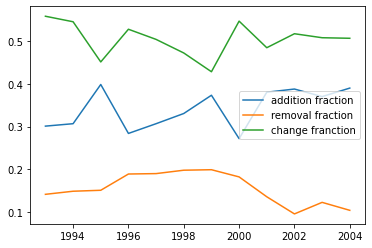

In [11]:
fraction_changes.plot()

Compute the total number of occurrences of the word ustawa in any inflectional form (ustawa, ustawie, ustawę, etc.) and all spelling forms (ustawa, Ustawa, USTAWA), excluding other words with the same prefix (e.g. ustawić).

In [56]:
ustawa_flections = '(ustawa|ustawy|ustawie|ustawę|ustawą|ustawo|ustawy|ustaw|ustawom|ustawami|ustawach)'

In [58]:
ustawa_counter = count_pattern_occurrences(fr'\b{ustawa_flections}\b')
ustawa_counter

24934

Compute the total number of occurrences of the same word (same conditions), followed by z dnia expression.

In [59]:
ustawa_with_dnia_counter = count_pattern_occurrences(fr'\b{ustawa_flections}\b(?!\sz\sdnia)')
ustawa_with_dnia_counter

17418

As above, but not followed by z dnia expression. Is the result correct (result 4 =? result 5 + result 6)?

In [60]:
ustawa_without_dnia_counter = count_pattern_occurrences(fr'\b{ustaw_flections}\b(?=\sz\sdnia)')
ustawa_without_dnia_counter

7516

In [61]:
ustawa_counter == ustawa_with_dnia_counter + ustawa_without_dnia_counter

True

Compute the total number of occurrences of the word ustawa in any inflectional form, excluding occurrences following o zmianie expression.

In [63]:
ustawa_without_o_zmianie = count_pattern_occurrences(fr'(?<!(o\szmianie\s))\b{ustaw_flections}\b')
ustawa_without_o_zmianie

24082

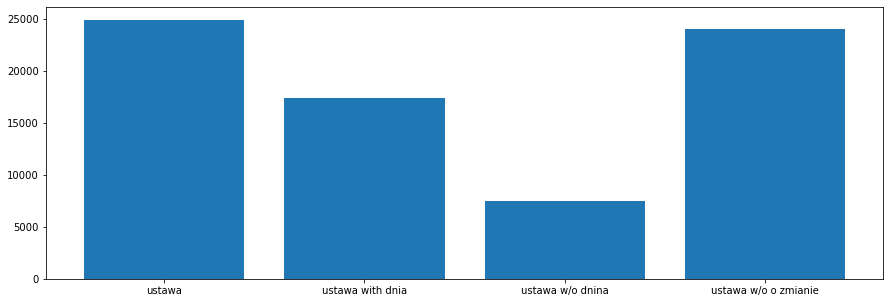

In [64]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
plt.bar(
    ['ustawa', 'ustawa with dnia', 'ustawa w/o dnina', 'ustawa w/o o zmianie'],
    [ustawa_counter,ustawa_with_dnia_counter,ustawa_without_dnia_counter,ustawa_without_o_zmianie]
)

plt.show()